In [1]:
# =======================================
# 1) Importación de librerías necesarias
# =======================================
import pandas as pd  # Importamos la librería pandas para trabajar con DataFrames

# =======================================
# 2) Creación de un DataFrame con datos simulados
# =======================================
# Creamos un diccionario que contiene comentarios simulados
data = {
    'texto_comentario': [
        'El equipo funciona de maravilla, no hemos tenido fallas en semanas',
        'Esta máquina hace demasiado ruido, es muy molesto',
        'El rendimiento es aceptable, aunque podría mejorar en velocidad',
        'Buen soporte técnico, pero a veces tarda en responder',
        'La línea de producción se detuvo inesperadamente ayer, fue un caos',
        'Excelente funcionamiento, los operadores están muy satisfechos'
    ]
}

# Convertimos el diccionario en un DataFrame
df = pd.DataFrame(data)

# Mostramos el contenido del DataFrame
df

,texto_comentario
0,"El equipo funciona de maravilla, no hemos teni..."
1,"Esta máquina hace demasiado ruido, es muy molesto"
2,"El rendimiento es aceptable, aunque podría mej..."
3,"Buen soporte técnico, pero a veces tarda en re..."
4,La línea de producción se detuvo inesperadamen...
5,"Excelente funcionamiento, los operadores están..."


In [2]:
# =======================================
# 2) Limpieza básica del texto
# =======================================
import re  # Importamos la librería 're' para trabajar con expresiones regulares

# Definimos una función para limpiar cada comentario
def limpiar_texto(texto):
    """
    Función que realiza limpieza básica de texto:
    - Convierte todo el texto a minúsculas.
    - Elimina signos de puntuación.
    - Elimina caracteres especiales.
    - Remueve espacios en blanco innecesarios.
    """
    texto = texto.lower()  # Convertimos el texto a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminamos signos de puntuación y caracteres especiales
    texto = texto.strip()  # Eliminamos espacios en blanco al inicio y al final
    return texto  # Retornamos el texto limpio

# Aplicamos la función de limpieza a la columna 'texto_comentario'
df['texto_limpio'] = df['texto_comentario'].apply(limpiar_texto)

# Mostramos el DataFrame actualizado con la columna 'texto_limpio'
df

,texto_comentario,texto_limpio
0,"El equipo funciona de maravilla, no hemos teni...",el equipo funciona de maravilla no hemos tenid...
1,"Esta máquina hace demasiado ruido, es muy molesto",esta máquina hace demasiado ruido es muy molesto
2,"El rendimiento es aceptable, aunque podría mej...",el rendimiento es aceptable aunque podría mejo...
3,"Buen soporte técnico, pero a veces tarda en re...",buen soporte técnico pero a veces tarda en res...
4,La línea de producción se detuvo inesperadamen...,la línea de producción se detuvo inesperadamen...
5,"Excelente funcionamiento, los operadores están...",excelente funcionamiento los operadores están ...


In [3]:
from deep_translator import GoogleTranslator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Descargar el lexicón de VADER
nltk.download('vader_lexicon')

# Crear el traductor y el analizador VADER
translator = GoogleTranslator(source='auto', target='en')
analyzer = SentimentIntensityAnalyzer()

# Función para traducir y analizar el texto
def traducir_y_analizar(texto):
    texto_traducido = translator.translate(texto)  # Traducir texto al inglés
    puntaje = analyzer.polarity_scores(texto_traducido)['compound']  # Obtener puntaje de sentimiento
    if puntaje >= 0.05:
        return 'Positivo'
    elif puntaje <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicar al DataFrame
df['sentimiento_traducido'] = df['texto_limpio'].apply(traducir_y_analizar)

# Mostrar resultado
df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Fabelec\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,texto_comentario,texto_limpio,sentimiento_traducido
0,"El equipo funciona de maravilla, no hemos teni...",el equipo funciona de maravilla no hemos tenid...,Positivo
1,"Esta máquina hace demasiado ruido, es muy molesto",esta máquina hace demasiado ruido es muy molesto,Negativo
2,"El rendimiento es aceptable, aunque podría mej...",el rendimiento es aceptable aunque podría mejo...,Positivo
3,"Buen soporte técnico, pero a veces tarda en re...",buen soporte técnico pero a veces tarda en res...,Positivo
4,La línea de producción se detuvo inesperadamen...,la línea de producción se detuvo inesperadamen...,Negativo
5,"Excelente funcionamiento, los operadores están...",excelente funcionamiento los operadores están ...,Positivo


In [4]:
# =======================================
# 3) Análisis de Sentimientos con VADER (NLTK)
# =======================================
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Importamos el analizador VADER
import nltk  # Importamos NLTK para gestionar recursos

# Descargamos el lexicón de VADER (solo es necesario hacerlo una vez)
nltk.download('vader_lexicon')

# Creamos una instancia del analizador de sentimientos de VADER
analyzer = SentimentIntensityAnalyzer()

# Definimos una función para obtener el sentimiento basado en el puntaje compuesto de VADER
def obtener_sentimiento_vader(texto):
    """
    Función que evalúa el sentimiento de un texto utilizando VADER:
    - Calcula puntajes de positividad, neutralidad y negatividad.
    - El puntaje compuesto ('compound') se usa para determinar la polaridad general.
    - Regresa 'Positivo', 'Negativo' o 'Neutral' basado en el puntaje compuesto.
    """
    scores = analyzer.polarity_scores(texto)  # Calcula los puntajes de sentimiento
    compound_score = scores['compound']  # Extraemos el puntaje compuesto
    
    # Definimos las categorías de sentimiento basándonos en el puntaje compuesto
    if compound_score >= 0.05:
        return 'Positivo'
    elif compound_score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicamos la función de análisis a la columna 'texto_limpio' del DataFrame
df['sentimiento_vader'] = df['texto_limpio'].apply(obtener_sentimiento_vader)

# Mostramos el DataFrame actualizado con la nueva columna 'sentimiento_vader'
df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Fabelec\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,texto_comentario,texto_limpio,sentimiento_traducido,sentimiento_vader
0,"El equipo funciona de maravilla, no hemos teni...",el equipo funciona de maravilla no hemos tenid...,Positivo,Negativo
1,"Esta máquina hace demasiado ruido, es muy molesto",esta máquina hace demasiado ruido es muy molesto,Negativo,Neutral
2,"El rendimiento es aceptable, aunque podría mej...",el rendimiento es aceptable aunque podría mejo...,Positivo,Neutral
3,"Buen soporte técnico, pero a veces tarda en re...",buen soporte técnico pero a veces tarda en res...,Positivo,Neutral
4,La línea de producción se detuvo inesperadamen...,la línea de producción se detuvo inesperadamen...,Negativo,Neutral
5,"Excelente funcionamiento, los operadores están...",excelente funcionamiento los operadores están ...,Positivo,Neutral


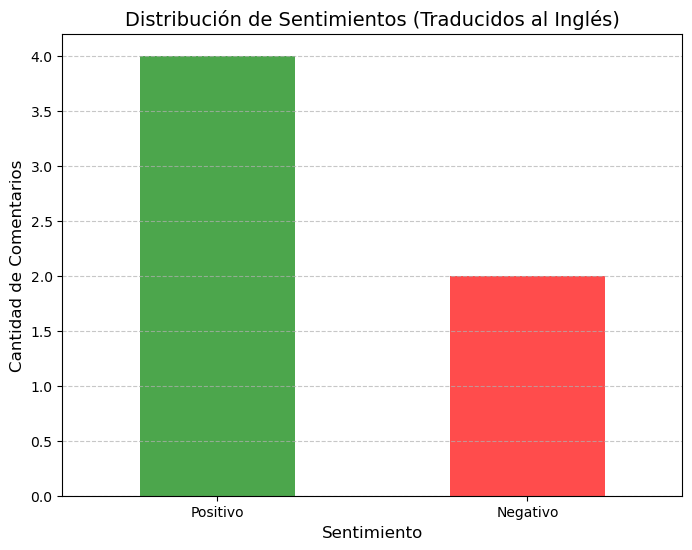

In [5]:
import matplotlib.pyplot as plt  # Importamos la librería de visualización

# Contamos la frecuencia de cada categoría en 'sentimiento_traducido'
conteo_sentimientos = df['sentimiento_traducido'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
conteo_sentimientos.plot(kind='bar', color=['green', 'red', 'gray'], alpha=0.7)
plt.title('Distribución de Sentimientos (Traducidos al Inglés)', fontsize=14)
plt.xlabel('Sentimiento', fontsize=12)
plt.ylabel('Cantidad de Comentarios', fontsize=12)
plt.xticks(rotation=0)  # Mantener etiquetas horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
